In [1]:
from dm_tools_dataprep import data_prep

df = data_prep()

/Users/hanzhe/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Columns: 119 entries, VehYear to VNST_WV
dtypes: float64(11), int64(2), uint8(106)
memory usage: 8.3 MB
None


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# preprocessing step
df = data_prep()

# target/input split
y = df['IsBadBuy']
X = df.drop(['IsBadBuy'], axis=1)

/Users/hanzhe/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [5]:
# OverSampling

from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier
from collections import Counter

ros = RandomOverSampler(random_state=0)
rs = 10

X_mat = X.as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.2, stratify=y,random_state=rs)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

/Users/hanzhe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [6]:
# Oversampling tree training
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

model = DecisionTreeClassifier(random_state=rs)
model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [7]:
print("Train accuracy:", model.score(X_resampled, y_resampled))
print("Test accuracy:", model.score(X_test, y_test))
y_pred2 = model.predict(X_test)
print(classification_report(y_test, y_pred2))

Train accuracy: 0.9994114184814596
Test accuracy: 0.78351012536162
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7222
           1       0.21      0.23      0.22      1074

   micro avg       0.78      0.78      0.78      8296
   macro avg       0.54      0.55      0.55      8296
weighted avg       0.80      0.78      0.79      8296



In [8]:
# size of tree

import numpy as np

print("Number of Nodes:", model.tree_.node_count)
leave_id = model.apply(X_resampled)
leave_id = np.unique(leave_id)
print("Number of Leaves", len(leave_id))

Number of Nodes: 9159
Number of Leaves 4580


In [9]:
# grab feature importances from the model and feature name from the original X

import numpy as np

importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

VehBCost : 0.1109254528086673
MMRCurrentAuctionAveragePrice : 0.06543886773897936
MMRCurrentRetailCleanPrice : 0.06418232935150114
MMRAcquisitionAuctionCleanPrice : 0.062275288896206996
MMRCurrentAuctionCleanPrice : 0.06132880579493668
MMRAcquisitionRetailAveragePrice : 0.0601700677270838
WarrantyCost : 0.059776884941303746
MMRAcquisitonRetailCleanPrice : 0.056912316266853294
MMRCurrentRetailAveragePrice : 0.05550784567068383
VehYear : 0.05470128063820718
MMRAcquisitionAuctionAveragePrice : 0.04752804140629372
WheelType_Alloy : 0.021192289551479324
Auction_MANHEIM : 0.014693399750707695
VNST_FL : 0.00962534378630858
VNST_TX : 0.008686836201866116
Color_WHITE : 0.008632210753069804
VNST_NC : 0.008361450309995121
Color_BLUE : 0.007908524069466518
VNST_CO : 0.007798832401680863
Color_GOLD : 0.007623135312806776


In [10]:
# visualize

import pydot
from io import StringIO
from sklearn.tree import export_graphviz

dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("OverSampledTree_1.png")

In [11]:
#retrain with a small max_depth limit

model = DecisionTreeClassifier(max_depth=3, random_state=rs)
model.fit(X_resampled, y_resampled)

print("Train accuracy:", model.score(X_resampled, y_resampled))
print("Test accuracy:", model.score(X_test, y_test))

y_pred2 = model.predict(X_test)
print(classification_report(y_test, y_pred2))

Train accuracy: 0.6331059792957795
Test accuracy: 0.563404050144648
              precision    recall  f1-score   support

           0       0.92      0.54      0.68      7222
           1       0.18      0.69      0.29      1074

   micro avg       0.56      0.56      0.56      8296
   macro avg       0.55      0.62      0.49      8296
weighted avg       0.83      0.56      0.63      8296



In [12]:
# size of tree

import numpy as np

print("Number of Nodes:", model.tree_.node_count)
leave_id = model.apply(X_resampled)
leave_id = np.unique(leave_id)
print("Number of Leaves", len(leave_id))

Number of Nodes: 15
Number of Leaves 8


In [13]:
# grab feature importance from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("OversampledTree_2.png") # saved in the following file

VehYear : 0.4605046024782815
WheelType_Alloy : 0.2180297346586578
VehBCost : 0.15948810292002452
Auction_MANHEIM : 0.09759878560795004
WheelType_Covers : 0.06437877433508618
Make_NISSAN : 0.0
Make_OLDSMOBILE : 0.0
Make_MITSUBISHI : 0.0
Make_VOLKSWAGEN : 0.0
Make_PONTIAC : 0.0
Make_MINI : 0.0
Make_SATURN : 0.0
Make_SCION : 0.0
Make_SUBARU : 0.0
Make_MERCURY : 0.0
Make_SUZUKI : 0.0
Make_TOYOTA : 0.0
Color_BEIGE : 0.0
Make_VOLVO : 0.0
Color_? : 0.0


In [14]:
test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(X_resampled, y_resampled)
    
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_resampled, y_resampled))

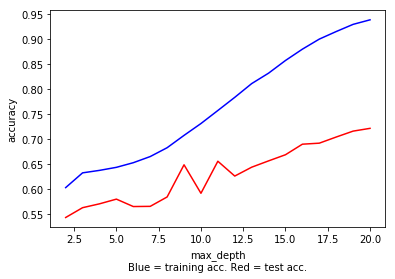

In [16]:
import matplotlib.pyplot as plt

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

In [19]:
#retrain with a guessing max_depth limit from the pyplot

model = DecisionTreeClassifier(max_depth=9, random_state=rs)
model.fit(X_resampled, y_resampled)

print("Train accuracy:", model.score(X_resampled, y_resampled))
print("Test accuracy:", model.score(X_test, y_test))

y_pred2 = model.predict(X_test)
print(classification_report(y_test, y_pred2))

print("Number of Nodes:", model.tree_.node_count)
leave_id = model.apply(X_resampled)
leave_id = np.unique(leave_id)
print("Number of Leaves", len(leave_id))

print('---------------------')
# grab feature importance from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("OversampledTree_3.png") # saved in the following file

Train accuracy: 0.7080808780251359
Test accuracy: 0.649228543876567
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      7222
           1       0.20      0.57      0.30      1074

   micro avg       0.65      0.65      0.65      8296
   macro avg       0.56      0.62      0.53      8296
weighted avg       0.82      0.65      0.71      8296

Number of Nodes: 671
Number of Leaves 336
---------------------
VehYear : 0.18127568958971066
VehBCost : 0.1426563747250479
WheelType_Alloy : 0.080480484761634
MMRCurrentAuctionCleanPrice : 0.06405430639168028
MMRCurrentAuctionAveragePrice : 0.059366807430138085
MMRAcquisitonRetailCleanPrice : 0.05181643454819315
Auction_MANHEIM : 0.047873294414385766
MMRCurrentRetailCleanPrice : 0.04076959382702864
WarrantyCost : 0.039643098743202154
MMRAcquisitionAuctionCleanPrice : 0.036860223155080925
MMRCurrentRetailAveragePrice : 0.0330394446762324
MMRAcquisitionRetailAveragePrice : 0.028782620649845738
Wheel

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
# grid search CV #1.1
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 12),
          'min_samples_leaf': range(20, 80, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_resampled, y_resampled)

print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred2 = cv.predict(X_test)
print(classification_report(y_test, y_pred2))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.738704428210366
Test accuracy: 0.6645371263259402
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      7222
           1       0.20      0.53      0.29      1074

   micro avg       0.66      0.66      0.66      8296
   macro avg       0.55      0.61      0.53      8296
weighted avg       0.82      0.66      0.72      8296

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 20}


In [26]:
# grid search CV #1.2

params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 6),
          'min_samples_leaf': range(20, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_resampled, y_resampled)

print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred2 = cv.predict(X_test)
print(classification_report(y_test, y_pred2))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.6439774261676419
Test accuracy: 0.5804001928640309
              precision    recall  f1-score   support

           0       0.92      0.57      0.70      7222
           1       0.18      0.66      0.29      1074

   micro avg       0.58      0.58      0.58      8296
   macro avg       0.55      0.61      0.50      8296
weighted avg       0.82      0.58      0.65      8296

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30}


In [27]:
# grid search CV #1.3

params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(8, 12),
          'min_samples_leaf': range(20, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_resampled, y_resampled)

print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred2 = cv.predict(X_test)
print(classification_report(y_test, y_pred2))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.738704428210366
Test accuracy: 0.6645371263259402
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      7222
           1       0.20      0.53      0.29      1074

   micro avg       0.66      0.66      0.66      8296
   macro avg       0.55      0.61      0.53      8296
weighted avg       0.82      0.66      0.72      8296

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 20}


In [28]:
# grid search CV #2.1

params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 6),
          'min_samples_leaf': range(25, 36)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_resampled, y_resampled)

print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred2 = cv.predict(X_test)
print(classification_report(y_test, y_pred2))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.6439774261676419
Test accuracy: 0.5804001928640309
              precision    recall  f1-score   support

           0       0.92      0.57      0.70      7222
           1       0.18      0.66      0.29      1074

   micro avg       0.58      0.58      0.58      8296
   macro avg       0.55      0.61      0.50      8296
weighted avg       0.82      0.58      0.65      8296

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 28}


In [29]:
# grid search CV #2.2

params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(8, 12),
          'min_samples_leaf': range(15, 26)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_resampled, y_resampled)

print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred2 = cv.predict(X_test)
print(classification_report(y_test, y_pred2))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.7413357338226638
Test accuracy: 0.6614030858244937
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      7222
           1       0.20      0.53      0.29      1074

   micro avg       0.66      0.66      0.66      8296
   macro avg       0.55      0.61      0.53      8296
weighted avg       0.82      0.66      0.71      8296

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 15}


In [30]:
#retrain with settings sellected from Grid SearchCV

model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=28, random_state=rs)
model.fit(X_resampled, y_resampled)

print("Train accuracy:", model.score(X_resampled, y_resampled))
print("Test accuracy:", model.score(X_test, y_test))

y_pred2 = model.predict(X_test)
print(classification_report(y_test, y_pred2))

print("Number of Nodes:", model.tree_.node_count)
leave_id = model.apply(X_resampled)
leave_id = np.unique(leave_id)
print("Number of Leaves", len(leave_id))

print('---------------------')
# grab feature importance from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("OversampledTree_GSCV.png") # saved in the following file

Train accuracy: 0.6439774261676419
Test accuracy: 0.5804001928640309
              precision    recall  f1-score   support

           0       0.92      0.57      0.70      7222
           1       0.18      0.66      0.29      1074

   micro avg       0.58      0.58      0.58      8296
   macro avg       0.55      0.61      0.50      8296
weighted avg       0.82      0.58      0.65      8296

Number of Nodes: 63
Number of Leaves 32
---------------------
VehYear : 0.3605598483300544
VehBCost : 0.18342675483982754
WheelType_Alloy : 0.16540385065936408
Auction_MANHEIM : 0.09603297774823076
WheelType_Covers : 0.04883965571221068
WarrantyCost : 0.03634483153692984
MMRCurrentAuctionAveragePrice : 0.026876438800483182
Make_CHRYSLER : 0.012347996464552704
MMRCurrentAuctionCleanPrice : 0.012202946080165327
MMRAcquisitonRetailCleanPrice : 0.011861693995047256
TopThreeAmericanName_GM : 0.009714636977455934
MMRAcquisitionAuctionCleanPrice : 0.008188682596664007
VNST_OK : 0.008088040291975346
Make_

In [31]:
# do the feature importance and visualization analysis on GridSearchCV's best model
from dm_tools_OptTree import analyse_feature_importance, visualize_decision_tree

analyse_feature_importance(cv.best_estimator_, X.columns, 20)
visualize_decision_tree(cv.best_estimator_, X.columns, "optimal_tree_Oversampled.png")

VehYear : 0.13993913036080477
VehBCost : 0.12791109262362857
MMRCurrentAuctionCleanPrice : 0.06779168641314068
MMRCurrentAuctionAveragePrice : 0.06534963217656668
WheelType_Alloy : 0.06238796348653678
MMRAcquisitionRetailAveragePrice : 0.0572686984888536
MMRAcquisitonRetailCleanPrice : 0.05486935124043703
MMRCurrentRetailAveragePrice : 0.04796788403048691
MMRAcquisitionAuctionCleanPrice : 0.04426718814911049
WarrantyCost : 0.043560230075677074
MMRCurrentRetailCleanPrice : 0.04020332678391406
MMRAcquisitionAuctionAveragePrice : 0.03868440416377093
Auction_MANHEIM : 0.037568194513510025
WheelType_Covers : 0.01799837622225871
VNST_NC : 0.009444140361088054
Make_CHRYSLER : 0.00904900664684796
VNST_TX : 0.008956064849884671
TopThreeAmericanName_GM : 0.008889061793859497
VNST_OK : 0.008589736773800441
Make_DODGE : 0.0068905401073559415
